In [108]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib import dates

In [109]:
data = pd.read_csv('./data/cotton/PCOTTINDUSDM.csv', parse_dates = True).round(2)
data.head()

,DATE,PCOTTINDUSDM
0,1990-01-01,75.20
1,1990-02-01,75.96
2,1990-03-01,78.90
3,1990-04-01,82.87
4,1990-05-01,85.60


In [110]:
data.tail()

,DATE,PCOTTINDUSDM
413,2024-06-01,83.24
414,2024-07-01,81.38
415,2024-08-01,79.93
416,2024-09-01,82.56
417,2024-10-01,83.69


In [111]:
data = data.rename(columns={'PCOTTINDUSDM': 'Cotton Price'})

In [112]:
fig = px.line(data, x='DATE', y='Cotton Price', title='Cotton Price in USD')
fig.update_layout(yaxis=dict(title=dict(text='USD')))
fig.show()

March 2011: https://www.ft.com/content/3d876e64-35c9-11e0-b67c-00144feabdc0

May 2022: https://www.cotlook.com/information-2/cotlook-monthly/may-2022-market-summary/#

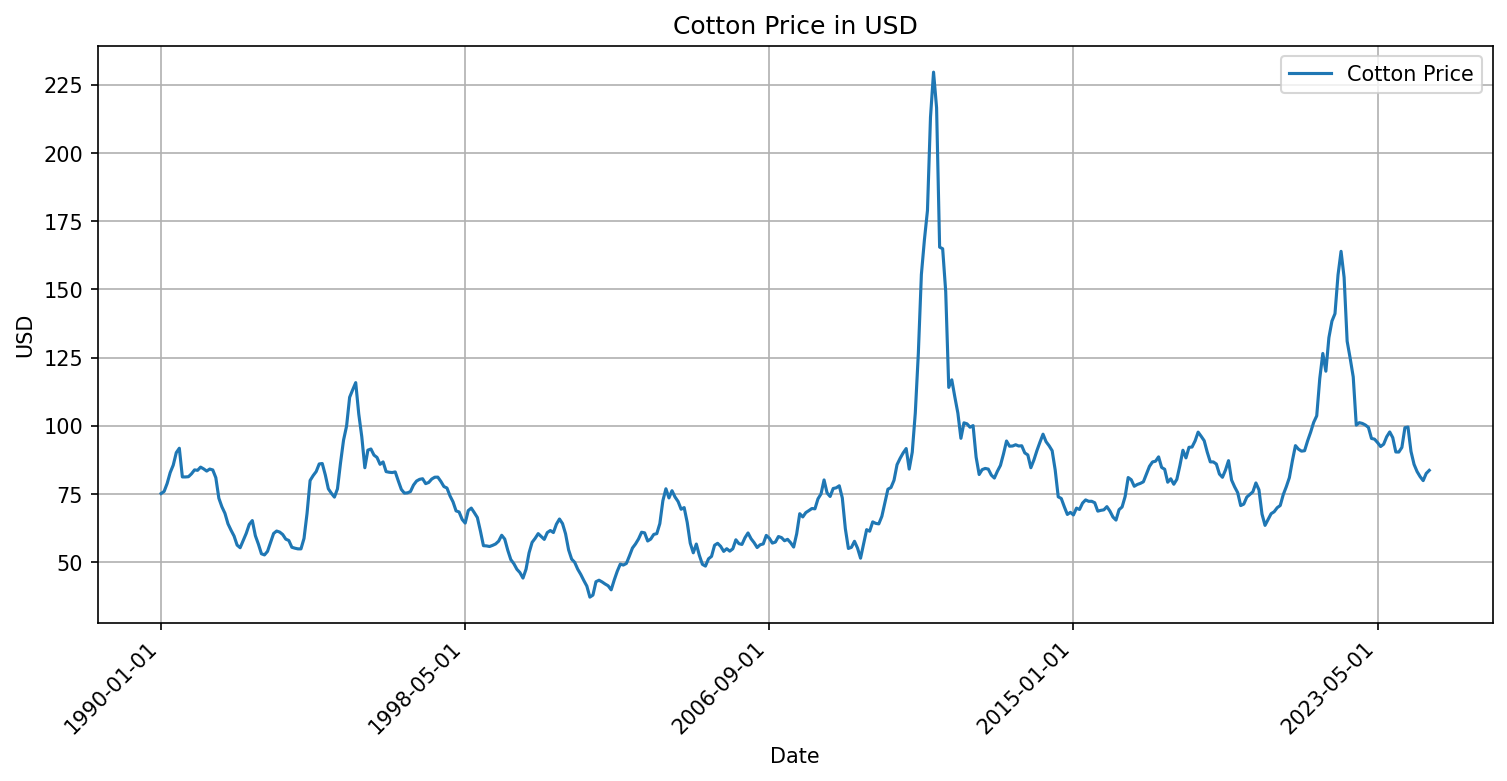

In [113]:
plt.figure(figsize=(12, 5), dpi=150)
ax = data.plot(x='DATE', y='Cotton Price', ax=plt.gca())
plt.xticks(rotation=45, ha='right')
plt.xlabel('Date')
plt.ylabel('USD')
plt.title('Cotton Price in USD')

ax.xaxis.grid(True)
ax.yaxis.grid(True)

plt.show()


Regression

In [114]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [115]:
data['DATE'] = pd.to_datetime(data['DATE'])
data['YEAR'] = data['DATE'].dt.year
data['MONTH'] = data['DATE'].dt.month

In [116]:
X = data[['YEAR', 'MONTH']]
y = data['Cotton Price']

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")

Root Mean Squared Error (RMSE): 5.131648220914449
Mean Absolute Error (MAE): 3.653991666666675


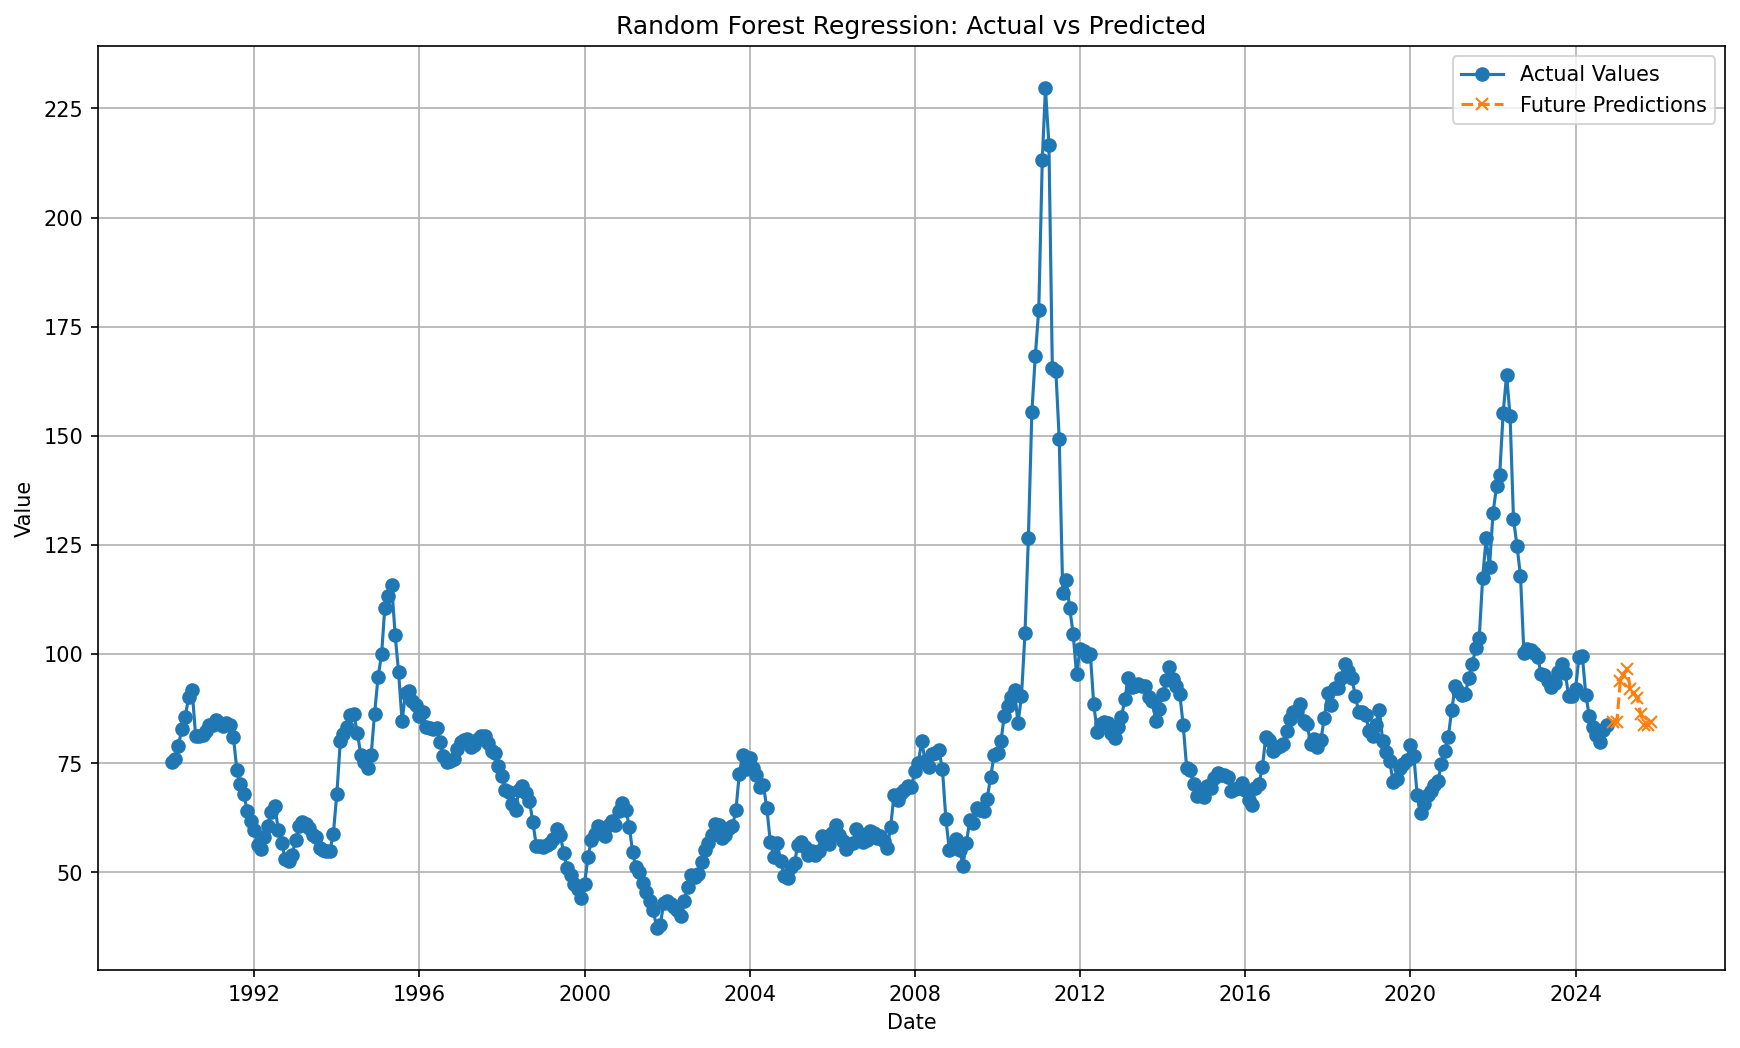

In [118]:
future_dates = pd.date_range(start="2024-11-01", periods=12, freq='M')
future_df = pd.DataFrame({
    'DATE': future_dates,
    'YEAR': future_dates.year,
    'MONTH': future_dates.month
})
future_X = future_df[['YEAR', 'MONTH']]
future_predictions = rf_model.predict(future_X)

plt.figure(figsize=(14, 8), dpi=150)
plt.plot(data['DATE'], y, label='Actual Values', marker='o')
plt.plot(future_dates, future_predictions, label='Future Predictions', linestyle='--', marker='x')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Random Forest Regression: Actual vs Predicted')
plt.legend()
plt.grid(True)
plt.show()